In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/heart.csv")

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df1 = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
1,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
4,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
299,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
300,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
301,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0


In [ ]:
X= df1.drop(columns=['output'])
y= df1['output']

In [ ]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler1= MinMaxScaler()
MinMax_scaled_X= scaler1.fit_transform(X)
MinMax_scaled_X

array([[0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.625     , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.52083333, 1.        , 0.33333333, ..., 1.        , 0.25      ,
        1.        ],
       ...,
       [0.79166667, 0.        , 0.66666667, ..., 1.        , 0.25      ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.52083333, 1.        , 0.66666667, ..., 0.5       , 0.        ,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(MinMax_scaled_X,y,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

<font color= "Blue"> <h1> <b> Neural Network 😀

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(20, activation='relu',input_dim=13))
# Adding dropout to prevent overfitting
classifier.add(Dense(10,activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(5,activation='relu'))
classifier.add(Dropout(rate=0.1))

In [ ]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size= 64, epochs=150)

Epoch 1/150
4/4 [==============================] - 4s 14ms/step - loss: 0.7153 - accuracy: 0.4339
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 0.7113 - accuracy: 0.4711
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.7045 - accuracy: 0.5083
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.6982 - accuracy: 0.5124
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.6984 - accuracy: 0.4917
Epoch 6/150
4/4 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.5289
Epoch 7/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6948 - accuracy: 0.5289
Epoch 8/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6882 - accuracy: 0.5744
Epoch 9/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6884 - accuracy: 0.5702
Epoch 10/150
4/4 [==============================] - 0s 17ms/step - loss: 0.6842 - accuracy: 0.6240
Epoch 11/150
4/4 [=====

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 

In [ ]:
# Evaluate the model
loss, accuracy = classifier.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 10ms/step - loss: 0.3754 - accuracy: 0.8689
Test Loss: 0.375399112701416
Test Accuracy: 0.868852436542511


2/2 [==============================] - 0s 21ms/step


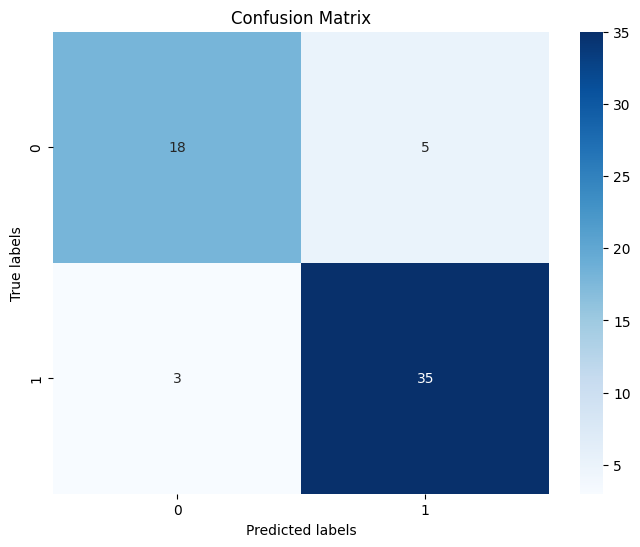

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#  probabilities for the test set
y_pred_prob = classifier.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

